# CEE6501 — Lecture 2.1

## Matrix Representation and Operations


## Learning Objectives

By the end of this lecture, you will:
- Understand matrices as **linear mappings** and as data structures
- Use consistent **notation** for scalars, vectors, and matrices
- Interpret matrix–vector and matrix–matrix products
- Reason about **dimensions, structure, and compatibility**
- Connect special matrix structure (symmetric/triangular/diagonal) to efficient solution strategies


## Part 1 — Scalars, Vectors, and Matrices

> What mathematical objects are we working with?


### Scalars

A **scalar** is a single numerical value:

$$
a \in \mathbb{R}
$$

Scalars have magnitude but no direction or internal structure.

### Vectors

A **vector** is an ordered collection of scalars:

$$
\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} \in \mathbb{R}^n
$$

Vectors are treated as **column objects** by default.

### Matrices

A **matrix** is a rectangular array of scalars:

$$
\mathbf{A}
=
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}
\in \mathbb{R}^{m \times n}
$$

Beyond being a table of numbers, a matrix represents a **linear mapping**
between vector spaces:

$$
\mathbf{A}\mathbf{x}=\mathbf{y}
$$

That is, the matrix $\mathbf{A}$ transforms an input vector $\{\mathbf{x}\}$
into an output vector $\{\mathbf{y}\}$.

A matrix can also be viewed as a rectangular array representing a **system of linear equations**, mapping an input vector $\{\mathbf{x}\}$ to an output vector $\{\mathbf{y}\}$:


For a 4×4 system:
$$
\begin{aligned}
a_{11}x_1 + a_{12}x_2 + a_{13}x_3 + a_{14}x_4 &= y_1 \\
a_{21}x_1 + a_{22}x_2 + a_{23}x_3 + a_{24}x_4 &= y_2 \\
a_{31}x_1 + a_{32}x_2 + a_{33}x_3 + a_{34}x_4 &= y_3 \\
a_{41}x_1 + a_{42}x_2 + a_{43}x_3 + a_{44}x_4 &= y_4
\end{aligned}
$$

Each row of $\mathbf{A}$ defines one equation.  
Each column of $\mathbf{A}$ multiplies one unknown.

$$
\begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14} \\
a_{21} & a_{22} & a_{23} & a_{24} \\
a_{31} & a_{32} & a_{33} & a_{34} \\
a_{41} & a_{42} & a_{43} & a_{44}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\ y_2 \\ y_3 \\ y_4
\end{bmatrix}
$$

## Part 2 — Notation Conventions

> How do we write linear algebra unambiguously in this class?


### Why Notation Matters

Consistent notation:
- Makes dimensions immediately visible
- Prevents algebraic errors
- Allows equations to be read without ambiguity


### Scalars

Scalars are written in **lowercase italic**:

$$
a,\; b,\; c \in \mathbb{R}
$$


### Vectors

Vectors are written in **bold lowercase**:

$$
\mathbf{x} =
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}
\in \mathbb{R}^n
$$

You may also see:
- $\{x\}$ (brace notation in some textbooks)


### Matrices

Matrices are written in **bold uppercase**:

$$
[A] = 
\mathbf{A} = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix} \in \mathbb{R}^{m \times n}
$$

You may also see:
- $[A]$ (square-bracket notation in some textbooks)


## Part 3 — Matrix Indexing

> How do we refer to individual entries precisely?


### Order (Size) of a Matrix

A matrix with $m$ rows and $n$ columns has size:

$$
\mathbf{A} \in \mathbb{R}^{m \times n}
$$

We say $\mathbf{A}$ is of order:

$$
m \times n
$$


### Matrix Elements

Each entry is called an **element**. The element in row $i$, column $j$ is:

$$
(\mathbf{A})_{ij} = a_{ij}
$$

- First subscript $i$ → row
- Second subscript $j$ → column

> Note: Python is 0-indexed, so row $i$, column $j$ corresponds to `A[i-1, j-1]`.

In [10]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# a_23 in math notation (row 2, column 3)
print(A[1, 2])   # Python indices: [2-1, 3-1]

6


### Meaning of Indices

For $\mathbf{A}\in\mathbb{R}^{m\times n}$:
- $i = 1,2,\dots,m$ (rows)
- $j = 1,2,\dots,n$ (columns)

So $a_{ij}$ is the element in the $i$-th row and $j$-th column.

### Example: A $4 \times 3$ Matrix

$$
\mathbf{D} =
\begin{bmatrix}
8 & 26 & 0 \\
33 & 5 & 37 \\
12 & 23 & 2 \\
7 & 29 & 14
\end{bmatrix}
$$

- Order: $4 \times 3$
- Rows: $i = 1,\dots,4$
- Columns: $j = 1,\dots,3$


### Referring to Individual Elements

Elements of $\mathbf{D}$ are $d_{ij}$.

Examples:
- $d_{13} = 0$
- $d_{31} = 12$
- $d_{42} = 29$


## Part 4 — Types of Matrices

> Matrix structure is not cosmetic — it reflects physics, modeling choices, and solver strategy.


### Why Matrix Types Matter

In matrix structural analysis, matrix *structure* tells us:
- which DOFs are coupled
- which solvers we can use
- how expensive a computation will be

We will see the same matrix appear in multiple forms:
- stiffness matrices
- mass matrices
- constraint and penalty matrices


### Column Matrix (Vector)

**Definition**

A matrix with a single column ($n=1$), commonly called a **vector**:

$$\mathbf{x} \in \mathbb{R}^{m\times 1}$$

$$
\mathbf{x}=
\begin{bmatrix}
x_1\\x_2\\\vdots\\x_m
\end{bmatrix}
$$


### Column Matrix — Structural Interpretation

Column matrices (vectors) are the **primary carriers of information** in matrix structural analysis. Inputs and Outputs.

They represent:
- **Displacements** $\mathbf{u}$ — the unknown DOFs we solve for
- **Loads** $\mathbf{f}$ — the forces driving the system
- **Reactions** — forces at constrained DOFs

All structural analysis reduces to:
$$
\mathbf{K}\mathbf{u}=\mathbf{f}
$$

How to read this:
- each entry corresponds to **one degree of freedom**
- vectors define *what is unknown* and *what is applied*


### Row Matrix

**Definition**

A matrix with a single row ($m=1$):

$$\mathbf{c} \in \mathbb{R}^{1\times n}$$

$$
\mathbf{c}=
\begin{bmatrix}
c_1 & c_2 & \cdots & c_n
\end{bmatrix}
$$


### Row Matrix — Structural Interpretation

Row matrices act as **operators on DOF vectors**.

They take a **column vector input** and return a **scalar quantity**.

Let the displacement vector be:
$$
\mathbf{u}=
\begin{bmatrix}
u_1\\
u_2\\
u_3\\
u_4
\end{bmatrix}
$$

Let the selector vector be:
$\mathbf{s_1} = \begin{bmatrix}
0 & 1 & 0 & 0
\end{bmatrix}
$
$
\mathbf{s_2} = \begin{bmatrix}
1 & -1 & 0 & 0
\end{bmatrix}
$

**DOF selection, $s_1$**
$$
\begin{bmatrix}
0 & 1 & 0 & 0
\end{bmatrix}
\cdot
\begin{bmatrix}
u_1\\
u_2\\
u_3\\
u_4
\end{bmatrix}
= u_2
$$

**DOF combination, $s_2$**
$$
\begin{bmatrix}
1 & -1 & 0 & 0
\end{bmatrix}
\cdot
\begin{bmatrix}
u_1\\
u_2\\
u_3\\
u_4
\end{bmatrix}
=
u_1 - u_2
$$

Interpretation:
- column vectors **store DOF values**
- row matrices **query or combine DOFs**
- output is a **single scalar condition**

### Square Matrix

**Definition**

A matrix with the same number of rows and columns ($m=n$):

$$\mathbf{A}\in\mathbb{R}^{n\times n}$$

The **main diagonal** contains $a_{11},a_{22},\dots,a_{nn}$.

### Square Matrix — Structural Meaning

Square matrices are the **heart of structural analysis**.

Direct stiffness method:
- **# equations = # unknown DOFs**
- → **square global system**

$$
\mathbf{K}\mathbf{u}=\mathbf{f},
\qquad
\mathbf{K}\in\mathbb{R}^{n\times n}
$$

How to read $\mathbf{K}$:
- rows → equilibrium at DOFs  
- columns → DOF influence  

Why it matters:
- direct solvers (LU, Cholesky, LDL$^T$) require **square matrices**
- structural equilibrium problems naturally produce square systems
- Not square → incomplete, over-constrained, or ill-posed.


### Symmetric Matrix

**Definition**

A square matrix where the entries are mirrored about the main diagonal:

$$a_{ij}=a_{ji} \quad \Leftrightarrow \quad \mathbf{A}^T=\mathbf{A}$$

$$
\mathbf{A}=
\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{12} & a_{22} & a_{23}\\
a_{13} & a_{23} & a_{33}
\end{bmatrix}
$$


### Symmetric Matrix — Structural Meaning  
*(special case of square matrices)*

Symmetry reflects **reciprocity and energy consistency**:

- **Reciprocity**: If moving DOF A causes a force at DOF B, then moving DOF B causes the same force at DOF A. The influence between two DOFs goes both ways
  $$k_{ij} = k_{ji}$$

- **Energy consistency**: The structure behaves like a spring that stores energy. The work done does not depend on the order in which displacements are applied — only on the final configuration.

Why symmetry matters:
- store only half the matrix  
- faster solvers (Cholesky, LDL$^T$)  


In this course, stiffness matrices are symmetric for all situations:
- linear elastic analysis  
- material nonlinearity (elastic, energy-based)  
- geometric nonlinearity (conservative)

### Triangular Matrices

**Definition**

A matrix where all entries on one side of the main diagonal are zero.

**Lower triangular**:
$$a_{ij}=0 \; (j>i)$$

**Upper triangular**:
$$a_{ij}=0 \; (j<i)$$

$$
\mathbf{L}=
\begin{bmatrix}
\ell_{11}&0&0\\
\ell_{21}&\ell_{22}&0\\
\ell_{31}&\ell_{32}&\ell_{33}
\end{bmatrix},
\quad
\mathbf{U}=
\begin{bmatrix}
u_{11}&u_{12}&u_{13}\\
0&u_{22}&u_{23}\\
0&0&u_{33}
\end{bmatrix}
$$


### Triangular Matrices — Structural Meaning


Triangular matrices appear in matrix structural analysis when a large system is **broken into simpler steps**.

Instead of solving
$$
\mathbf{K}\mathbf{u}=\mathbf{f}
$$
all at once, we factor the stiffness matrix:
$$
\mathbf{K}=\mathbf{L}\mathbf{U}
\quad \text{or} \quad
\mathbf{K}=\mathbf{L}\mathbf{D}\mathbf{L}^T
$$

This turns one difficult problem into **two easy ones**.

How to think about it:

- **Forward substitution** → uses the lower triangular matrix $\mathbf{L}$
- **Back substitution** → uses the upper triangular matrix $\mathbf{U}$

We will return to this in detail when we study **matrix solvers** in the next section.

### Diagonal Matrix

**Definition**

A matrix where all off-diagonal entries are zero:

$$
a_{ij} = 0 \quad \text{for } i \neq j
$$

$$
\mathbf{D}=
\begin{bmatrix}
d_1 & 0 & 0 \\
0 & d_2 & 0 \\
0 & 0 & d_3
\end{bmatrix}
$$


### Diagonal Matrix — Structural Interpretation

Diagonal matrices represent **uncoupled degrees of freedom**.

In matrix structural analysis, diagonal matrices commonly appear as:
- **Lumped mass matrices** in dynamics (each DOF has its own inertia)
- **Penalty stiffness matrices** for enforcing boundary conditions
- **Diagonal preconditioners** in iterative solvers (e.g., Jacobi, CG)

Interpretation:
- each diagonal term acts on **one DOF only**
- no force or displacement coupling between DOFs


### Identity (Unit) Matrix

**Definition**

A matrix where all diagonal entries are 1 and all off-diagonal entries are 0:

$$
I_{ij} =
\begin{cases}
1 & i=j \\
0 & i \neq j
\end{cases}
$$

$$
\mathbf{I}=
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

$$\mathbf{I}\mathbf{x}=\mathbf{x}$$


### Identity Matrix — Structural Interpretation

The identity matrix represents a **neutral operation** on a DOF vector.

In matrix structural analysis, it appears in:
- **Penalty methods**: $\mathbf{K} + \alpha \mathbf{I}$ for constraints
- **Regularization** of ill-conditioned stiffness matrices
- **Incremental–iterative solvers** (Newton updates)
- **Eigenvalue problems** and modal normalization

Interpretation:
- multiplying by $\mathbf{I}$ leaves DOFs unchanged
- adding $\alpha\mathbf{I}$ stiffens DOFs *without introducing coupling*


### Null (Zero) Matrix

**Definition**

A matrix where all entries equal to zero:

$$
o_{ij}=0
$$

$$
\mathbf{O}=
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
$$


### Null Matrix — Structural Interpretation

Zero matrices encode **absence of coupling** between DOF sets.

In matrix structural analysis, they arise in:
- **Partitioned stiffness matrices**:
$$
\begin{bmatrix}
\mathbf{K}_{ff} & \mathbf{0} \\
\mathbf{0} & \mathbf{K}_{cc}
\end{bmatrix}
$$
- Free vs constrained DOF separation
- Multi-component or multi-physics models before coupling

Interpretation:
- no force transfer between DOF groups
- modeling assumption of independent subsystems


## Part 5 — Matrix Compatibility for Operations

> When do operations make sense?


### Addition

Addition requires identical dimensions:

$$
\mathbf{A},\mathbf{B}\in\mathbb{R}^{m\times n}
$$

$$
\mathbf{A}+\mathbf{B}=[a_{ij}+b_{ij}]
$$


In [11]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])
B = np.array([[10, 20],
              [30, 40]])

print('A =\n', A)
print('B =\n', B)
print('A + B =\n', A + B)
print('shape(A), shape(B) =', A.shape, B.shape)


A =
 [[1 2]
 [3 4]]
B =
 [[10 20]
 [30 40]]
A + B =
 [[11 22]
 [33 44]]
shape(A), shape(B) = (2, 2) (2, 2)


### Multiplication Compatibility

Matrix multiplication requires inner dimensions to match:

$$
\mathbf{A}\in\mathbb{R}^{m\times n},\quad \mathbf{B}\in\mathbb{R}^{n\times p}
$$

$$
\mathbf{C}=\mathbf{A}\mathbf{B}\in\mathbb{R}^{m\times p}
$$


In [12]:
import numpy as np
A = np.random.randint(0, 10, (2, 3))  # 2x3
B = np.random.randint(0, 10, (3, 4))  # 3x4

C = A @ B  # 2x4

print('shape(A), shape(B), shape(C) =', A.shape, B.shape, C.shape)
print('\nA=\n', A)
print('\nB=\n', B)
print('\nA @ B=\n', C)

shape(A), shape(B), shape(C) = (2, 3) (3, 4) (2, 4)

A=
 [[8 2 2]
 [3 3 8]]

B=
 [[6 8 9 3]
 [1 5 7 1]
 [9 6 1 2]]

A @ B=
 [[68 86 88 30]
 [93 87 56 28]]


## Part 6 — Matrix–Vector Multiplication

> What does a matrix do to a vector?


### Linear Mapping

A matrix defines a linear transformation:

$$
\mathbf{y}=\mathbf{A}\mathbf{x}
$$

**Forward problem:** given $\mathbf{A}$ and $\mathbf{x}$, compute $\mathbf{y}$.


### Component Form = Row Dot Product

Each output component is:

$$
y_i = \sum_{j=1}^n a_{ij} x_j
$$

This is the **dot product** between row $i$ of $\mathbf{A}$ and the vector $\mathbf{x}$:

$$
y_i = \big(\text{row}_i(\mathbf{A})\big)\cdot \mathbf{x}
$$


### Annotated Figure: Computing One Component $y_i$

For a fixed row index $i$, the formula

$$y_i = \sum_{j=1}^n a_{ij}x_j$$

means: **take row $i$ of $\mathbf{A}$**, multiply elementwise by $\mathbf{x}$, then sum.

$$
\begin{bmatrix}
y_1 \\
\boxed{y_2} \\
y_3 \\
y_4
\end{bmatrix}
=
\begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14} \\
\boxed{a_{21}} & \boxed{a_{22}} & \boxed{a_{23}} & \boxed{a_{24}} \\
a_{31} & a_{32} & a_{33} & a_{34} \\
a_{41} & a_{42} & a_{43} & a_{44}
\end{bmatrix}
\begin{bmatrix}
\boxed{x_1} \\
\boxed{x_2} \\
\boxed{x_3} \\
\boxed{x_4}
\end{bmatrix}
$$



In [13]:
import numpy as np
# Example sizes
A = np.array([[2, 1, -1],
              [0, 3,  2],
              [4, -2, 1]], dtype=float)
x = np.array([1, 2, -1], dtype=float)

# Choose which component y_i to illustrate
i = 1  # second row (0-index)
y = A @ x

row_i = A[i, :]

print('Row i =', row_i)
print('Elementwise product row_i * x =', row_i * x)
print('y = A @ x =', y)
print(f'y_{i+1} (1-indexed) = sum_j a_{{{i+1}j}} x_j =', y[i])

Row i = [0. 3. 2.]
Elementwise product row_i * x = [ 0.  6. -2.]
y = A @ x = [ 5.  4. -1.]
y_2 (1-indexed) = sum_j a_{2j} x_j = 4.0


### Same Product, Column Interpretation

Let $\mathbf{A}=[\mathbf{a}_1\ \mathbf{a}_2\ \cdots\ \mathbf{a}_n]$ (columns). Then:

$$
\mathbf{A}\mathbf{x} = x_1\mathbf{a}_1 + x_2\mathbf{a}_2 + \cdots + x_n\mathbf{a}_n
$$

So $\mathbf{A}\mathbf{x}$ is a **linear combination of the columns of $\mathbf{A}$**.


### Column Interpretation — Numerical Example

#### Step 1 — Choose $\mathbf{A}$ and $\mathbf{x}$

$$
\mathbf{A}=
\begin{bmatrix}
2 & 1 \\
-1 & 3
\end{bmatrix},
\qquad
\mathbf{x}=
\begin{bmatrix}
4 \\
-2
\end{bmatrix}
$$

Our goal is to compute:

$$\mathbf{y}=\mathbf{A}\mathbf{x}$$


#### Step 2 — Write $\mathbf{A}$ by its columns

Let $\mathbf{A}=[\mathbf{a}_1\ \mathbf{a}_2]$, where:

$$
\mathbf{a}_1=
\begin{bmatrix}
2 \\
-1
\end{bmatrix},
\qquad
\mathbf{a}_2=
\begin{bmatrix}
1 \\
3
\end{bmatrix}
$$

The weights come from $\mathbf{x}$:

$$x_1=4,\quad x_2=-2$$


#### Step 3 — Form the linear combination

$$
\mathbf{A}\mathbf{x}
=x_1\mathbf{a}_1+x_2\mathbf{a}_2
=4\begin{bmatrix}2\\-1\end{bmatrix}
+(-2)\begin{bmatrix}1\\3\end{bmatrix}
$$


#### Step 4 — Compute the weighted columns and sum

$$
4\begin{bmatrix}2\\-1\end{bmatrix}
=\begin{bmatrix}8\\-4\end{bmatrix},
\qquad
(-2)\begin{bmatrix}1\\3\end{bmatrix}
=\begin{bmatrix}-2\\-6\end{bmatrix}
$$

Add them:

$$
\mathbf{y}=\mathbf{A}\mathbf{x}
=\begin{bmatrix}8\\-4\end{bmatrix}
+\begin{bmatrix}-2\\-6\end{bmatrix}
=\begin{bmatrix}6\\-10\end{bmatrix}
$$

**Conclusion:** $\mathbf{A}\mathbf{x}$ is a weighted sum of the columns of $\mathbf{A}$. 


### Visual: Linear Mapping of a Single Vector in $\mathbb{R}^2$

We choose a matrix $\mathbf{A}$ and a vector $\mathbf{x}$, then plot:

$$\mathbf{y}=\mathbf{A}\mathbf{x}$$


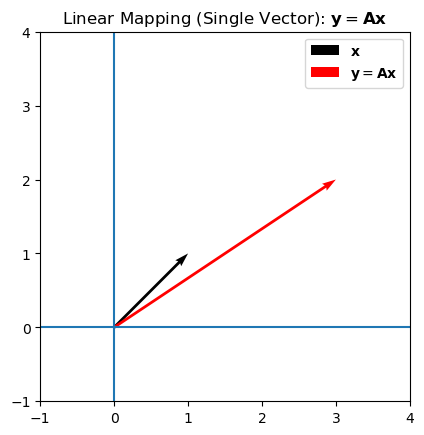

A =
 [[ 2.  1.]
 [-1.  3.]]
x = [1. 1.]
y = A @ x = [3. 2.]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[ 2,  1],
              [-1,  3]], dtype=float)

# single input vector
x = np.array([1, 1], dtype=float)
y = A @ x

plt.figure()
plt.axhline(0)
plt.axvline(0)

# Use quiver for labeled vectors
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, label=r'$\mathbf{x}$')
plt.quiver(0, 0, y[0], y[1], angles='xy', color='red', scale_units='xy', scale=1, label=r'$\mathbf{y}=\mathbf{A}\mathbf{x}$')

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.legend()
plt.title(r'Linear Mapping (Single Vector): $\mathbf{y}=\mathbf{A}\mathbf{x}$')
plt.show()

print('A =\n', A)
print('x =', x)
print('y = A @ x =', y)


### Same Equation, Different Questions

$$
\mathbf{y}=\mathbf{A}\mathbf{x}
\;\;\Longleftrightarrow\;\;
\mathbf{A}\mathbf{x}=\mathbf{b}
$$

The algebra is the same, but the **question changes**.

- **Forward problem**  
  Given $\mathbf{A}$ and $\mathbf{x}$, compute the response $\mathbf{y}$

- **Inverse problem**  
  Given $\mathbf{A}$ and $\mathbf{b}$, solve for the unknown $\mathbf{x}$

> Methods for the inverse problem are discussed in **Lecture 2.2**

### Example: Solving for $\mathbf{x}$ in $\mathbf{A}\mathbf{x}=\mathbf{b}$

Start with a system in unknowns $x_1, x_2$:

$$\begin{aligned}
2x_1 + 1x_2 &= 5 \\
-1x_1 + 3x_2 &= 4
\end{aligned}$$

Group coefficients, unknowns, and constants:

$$\underbrace{\begin{bmatrix} 2 & 1 \\ -1 & 3 \end{bmatrix}}_{\mathbf{A}}
\underbrace{\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}}_{\mathbf{x}}
=\underbrace{\begin{bmatrix} 5 \\ 4 \end{bmatrix}}_{\mathbf{b}}$$


In [15]:
import numpy as np

A = np.array([[ 2, 1],
              [-1, 3]], dtype=float)
b = np.array([5, 4], dtype=float)

# Solve A x = b (preferred over explicit inversion)
x = np.linalg.solve(A, b)

# print('A=\n', A)
# print('b=\n', b)
print('x=\n', x)
print('\nCheck: A @ x =', A @ x)
print('Residual ||A x - b|| =', np.linalg.norm(A @ x - b))


x=
 [1.57142857 1.85714286]

Check: A @ x = [5. 4.]
Residual ||A x - b|| = 0.0


## Part 7 — Matrix–Matrix Multiplication

> Multiplication composes linear transformations


### Component Definition (Row–Column Dot Product)

Given two matrices
$$
\mathbf{A}\in\mathbb{R}^{n\times m},
\qquad
\mathbf{B}\in\mathbb{R}^{m\times p},
$$
their product
$$
\mathbf{C}=\mathbf{A}\mathbf{B}
$$

$$
(\mathbf{C})_{ij} = \sum_{k} a_{ik} b_{kj}
$$

Interpretation:
- Fix $i$ (a row of $\mathbf{A}$)
- Fix $j$ (a column of $\mathbf{B}$)
- Take a dot product over $k$

### Annotated Figure: Row $i$ of $\mathbf{A}$ with Column $j$ of $\mathbf{B}$

Each entry of $\mathbf{C}$ is computed as:
$$
c_{ij}
=
a_{i1}b_{1j}
+
a_{i2}b_{2j}
+
\cdots
+
a_{im}b_{mj}
$$

<div style="display:flex; gap:1rem; align-items:flex-end;">

  <div style="flex:0.8; transform: translate(0px, 0px);">
    <figure style="margin:0; text-align:center; display:flex; flex-direction:column;">
      <img src="assets/L2_matrix_mult.png" style="width:100%; height:auto;">
      <figcaption style="font-size:0.75em; margin-top:0.4em;">
        <!-- Figure (a): Cable Net (Munich Olympic Stadium). -->
      </figcaption>
    </figure>
  </div>

</div>


### Example: Non-Commutativity

In general:

$$\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}$$

Even when both products are defined, they can produce different results.

In [16]:
import numpy as np

A = np.array([[1, 2],
              [0, 1]], dtype=float)
B = np.array([[2, 0],
              [3, 1]], dtype=float)

AB = A @ B
BA = B @ A

print('\nA @ B=\n', AB)
print('\nB @ A=\n', BA)
print('\nAB equals BA?', np.allclose(AB, BA))


A @ B=
 [[8. 2.]
 [3. 1.]]

B @ A=
 [[2. 4.]
 [3. 7.]]

AB equals BA? False


## Part 8 — Special Matrix Operations

> Useful transformations and operations


## Transpose
> Interchanging rows and columns of a matrix

The **transpose** of a matrix is obtained by interchanging its
rows and columns.

The transpose of $\mathbf{A}$ is denoted by a superscript $T$:
$$
\mathbf{A}^T
$$

Definition (element-wise):
$$
(\mathbf{A}^T)_{ij} = a_{ji}
$$

### Why the Transpose Matters

Transpose operations appear throughout:
- symmetry checks
- Cholesky and LDL$^T$ factorizations
- strain–displacement and equilibrium operators
- assembling and manipulating stiffness matrices

> Many structural matrices are symmetric by physics, not by accident


### Transpose — Example (Rectangular Matrix)

Consider the $3\times 2$ matrix
$$
\mathbf{B} =
\begin{bmatrix}
 2 & -4 \\
-5 &  8 \\
 1 &  3
\end{bmatrix}
\qquad (3\times 2)
$$

Its transpose is
$$
\mathbf{B}^T =
\begin{bmatrix}
 2 & -5 & 1 \\
-4 &  8 & 3
\end{bmatrix}
\qquad (2\times 3)
$$

Observation:
- rows of $\mathbf{B}$ become columns of $\mathbf{B}^T$
- dimensions are swapped

### Symmetric Matrices and the Transpose

Consider the matrix
$$
\mathbf{C} =
\begin{bmatrix}
 2 & -1 &  6 \\
-1 &  7 & -9 \\
 6 & -9 &  5
\end{bmatrix}
$$

This matrix satisfies
$$
\mathbf{C}^T = \mathbf{C}
$$

Definition:
- A matrix is **symmetric** if $a_{ij} = a_{ji}$

In [ ]:
import numpy as np

A_sym = np.array([
    [ 2.0, -1.0,  6.0],
    [-1.0,  7.0, -9.0],
    [ 6.0, -9.0,  5.0]
])

print("A_sym =\n", A_sym)
print("\nA_sym^T =\n", A_sym.T)
print("\nIs A_sym symmetric?",
      np.allclose(A_sym, A_sym.T))

A_sym =
 [[ 2. -1.  6.]
 [-1.  7. -9.]
 [ 6. -9.  5.]]

A_sym^T =
 [[ 2. -1.  6.]
 [-1.  7. -9.]
 [ 6. -9.  5.]]

Is A_sym symmetric? True


In [ ]:
import numpy as np

A_sym = np.array([
    [ 2.0, 1.0,  6.0],
    [-1.0,  7.0, -9.0],
    [ 6.0, -8.0,  5.0]
])

print("A_sym =\n", A_sym)
print("\nA_sym^T =\n", A_sym.T)
print("\nIs A_sym symmetric?",
      np.allclose(A_sym, A_sym.T))

A_sym =
 [[ 2.  1.  6.]
 [-1.  7. -9.]
 [ 6. -8.  5.]]

A_sym^T =
 [[ 2. -1.  6.]
 [ 1.  7. -8.]
 [ 6. -9.  5.]]

Is A_sym symmetric? False


### Transpose of a Product

The transpose of a product of matrices reverses the order:

$$
(\mathbf{A}\mathbf{B})^T = \mathbf{B}^T \mathbf{A}^T
$$

More generally,
$$
(\mathbf{A}\mathbf{B}\mathbf{C})^T
=
\mathbf{C}^T \mathbf{B}^T \mathbf{A}^T
$$

Key idea:
- transpose distributes over multiplication
- **order reverses**

## Inverse of a Square Matrix
> The matrix equivalent of division

The **inverse** of a square matrix $\mathbf{A}$ is a matrix $\mathbf{A}^{-1}$ such that

$$
\mathbf{A}\mathbf{A}^{-1} = \mathbf{A}^{-1}\mathbf{A} = \mathbf{I}
$$

Key points:
- Defined **only for square matrices**
- The inverse of a **symmetric matrix** is also symmetric
- If it exists, the inverse has the **same size** as $\mathbf{A}$
- Not all square matrices are invertible

### Why Inverses Matter (Conceptually)

Consider the linear system
$$
\mathbf{A}\mathbf{x}=\mathbf{b}
$$

Since division by a matrix is not defined, we **cannot** write
$\mathbf{x}=\mathbf{b}/\mathbf{A}$.

If $\mathbf{A}^{-1}$ exists, we may premultiply:
$$
\mathbf{A}^{-1}\mathbf{A}\mathbf{x}=\mathbf{A}^{-1}\mathbf{b}
$$

which gives
$$
\mathbf{x}=\mathbf{A}^{-1}\mathbf{b}.
$$

- In practice, we **rarely compute $\mathbf{A}^{-1}$ explicitly**
- Solving systems is usually done via **factorization + substitution**

### Orthogonal Matrices

A matrix $\mathbf{A}$ is called **orthogonal** if its inverse is equal to its transpose:

$$
\mathbf{A}^{-1} = \mathbf{A}^T
$$

Equivalently,
$$
\mathbf{A}^T \mathbf{A} = \mathbf{A}\mathbf{A}^T = \mathbf{I}
$$

Common cases:
- **Local ↔ global coordinate transformations**
  - rotating element stiffness matrices
  - transforming displacement and force vectors
- **Rigid-body rotations**
  - no strain, no energy change

## Matrix Partitioning
> Breaking a large system into smaller, meaningful blocks


In many applications, especially **structural analysis**, it is useful to subdivide
a matrix into **submatrices**.  

This process is called **matrix partitioning**.

Partitioning allows us to:
- treat groups of rows/columns together
- express large systems compactly
- perform algebra using **block operations**

> Submatrices can be manipulated like scalar entries,
as long as their dimensions are compatible.

### Motivation from Structural Analysis

In the direct stiffness method, degrees of freedom (DOFs) are naturally divided into:
- **free DOFs** (unknown displacements)
- **fixed DOFs** (prescribed displacements, often zero)

This leads to a natural block structure in the global system:
$$
\mathbf{K}\mathbf{u}=\mathbf{f}
$$

Partitioning lets us isolate the equations that actually need to be solved.

### Example: Partitioning a Matrix

Consider a matrix $\mathbf{B}\in\mathbb{R}^{4\times 3}$:

$$
\mathbf{B}
=
\begin{bmatrix}
2 & -4 & -1 \\
-5 & 7 & 3 \\
8 & -9 & 6 \\
1 & 3 & 8
\end{bmatrix}
$$

By drawing horizontal and vertical partition lines, we can write:

$$
\mathbf{B}
=
\left[
\begin{array}{cc|c}
2  & -4 & -1 \\
-5 &  7 &  3 \\
8  & -9 &  6 \\
\hline
1  &  3 &  8
\end{array}
\right]
$$

### Submatrices (Blocks)

$$
\mathbf{B}
=
\begin{bmatrix}
\mathbf{B}_{11} & \mathbf{B}_{12} \\
\mathbf{B}_{21} & \mathbf{B}_{22}
\end{bmatrix}
$$

The individual blocks are:

$$
\mathbf{B}_{11}=
\begin{bmatrix}
2 & -4 \\
-5 & 7 \\
8 & -9
\end{bmatrix},
\qquad
\mathbf{B}_{12}=
\begin{bmatrix}
-1 \\
3 \\
6
\end{bmatrix}
$$

$$
\mathbf{B}_{21}=
\begin{bmatrix}
1 & 3
\end{bmatrix},
\qquad
\mathbf{B}_{22}=
\begin{bmatrix}
8
\end{bmatrix}
$$

Each block is itself a matrix of appropriate size.

### Partitioned Matrix Multiplication

Given
$$
\mathbf{B}
=
\begin{bmatrix}
\mathbf{B}_{11}^{(3\times 2)} & \mathbf{B}_{12}^{(3\times 1)} \\
\mathbf{B}_{21}^{(1\times 2)} & \mathbf{B}_{22}^{(1\times 1)}
\end{bmatrix}
\;\in\; \mathbb{R}^{4\times 3}
$$

Suppose
$$
\mathbf{C}
=
\begin{bmatrix}
\mathbf{C}_{11}^{(2\times 2)} \\
\mathbf{C}_{21}^{(1\times 2)}
\end{bmatrix}
\;\in\; \mathbb{R}^{3\times 2}
$$

Then the product $\mathbf{B}\mathbf{C}$ can be written in block form as:

$$
\mathbf{B}\mathbf{C}
=
\begin{bmatrix}
\mathbf{B}_{11}^{(3\times 2)}\mathbf{C}_{11}^{(2\times 2)}
+
\mathbf{B}_{12}^{(3\times 1)}\mathbf{C}_{21}^{(1\times 2)}
\\[6pt]
\mathbf{B}_{21}^{(1\times 2)}\mathbf{C}_{11}^{(2\times 2)}
+
\mathbf{B}_{22}^{(1\times 1)}\mathbf{C}_{21}^{(1\times 2)}
\end{bmatrix}
\;\in\; \mathbb{R}^{4\times 2}
$$

The result is a **$2 \times 1$ block matrix**, corresponding to an overall
matrix of size **$4 \times 2$**.

### Key Requirement: Conformability

For block operations to be valid:
- block dimensions must be compatible
- partitioning of one matrix must match the partitioning of the other

In practice:
- rows of the second matrix are partitioned
  the same way as columns of the first

## Looking Ahead

➡️ **Next section:**  
We focus on **how inverses are constructed**, their limitations, and  
why numerical solvers usually avoid forming them explicitly.